Exploratory Data Analysis – Daily Precipitation (Miami)
Context / Contexto

EN
This notebook performs an exploratory data analysis (EDA) on daily meteorological data for Miami, FL, retrieved from the Open‑Meteo API. The main objective is to understand the statistical and temporal behavior of daily precipitation, and to assess the potential of physical atmospheric variables for predictive modeling.

ES
Este notebook realiza un análisis exploratorio de datos (EDA) sobre datos meteorológicos diarios de Miami, Florida, obtenidos desde la API de Open‑Meteo. El objetivo principal es comprender el comportamiento estadístico y temporal de la precipitación diaria, y evaluar el potencial predictivo de variables físicas atmosféricas.

1. Dataset Overview / Visión general del dataset

EN
We start by loading the dataset and performing basic sanity checks: structure, data types, missing values, and summary statistics.

ES
Comenzamos cargando el dataset y realizando verificaciones básicas: estructura, tipos de datos, valores faltantes y estadísticas descriptivas.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


# Load data
df = pd.read_csv("../data/raw/open_meteo_miami_daily.csv")


# Parse date
df["date"] = pd.to_datetime(df["date"])


# Basic inspection
df.info()
df.describe()
df.isna().sum()

<class 'pandas.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       12784 non-null  str           
 1   temperature_2m_max         12784 non-null  float64       
 2   temperature_2m_min         12784 non-null  float64       
 3   temperature_2m_mean        12784 non-null  float64       
 4   precipitation_sum          12784 non-null  float64       
 5   relative_humidity_2m_mean  12784 non-null  int64         
 6   surface_pressure_mean      12784 non-null  float64       
 7   wind_speed_10m_mean        12784 non-null  float64       
 8   cloud_cover_mean           12784 non-null  int64         
 9   date                       12784 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(6), int64(2), str(1)
memory usage: 998.9 KB


time                         0
temperature_2m_max           0
temperature_2m_min           0
temperature_2m_mean          0
precipitation_sum            0
relative_humidity_2m_mean    0
surface_pressure_mean        0
wind_speed_10m_mean          0
cloud_cover_mean             0
date                         0
dtype: int64

2. Target Variable: Daily Precipitation / Variable objetivo: precipitación diaria
2.1 Distribution

EN
Daily precipitation typically shows a highly skewed distribution, with many zero‑rain days and a long tail of extreme events.

ES
La precipitación diaria suele presentar una distribución altamente asimétrica, con muchos días sin lluvia y una cola larga de eventos extremos.

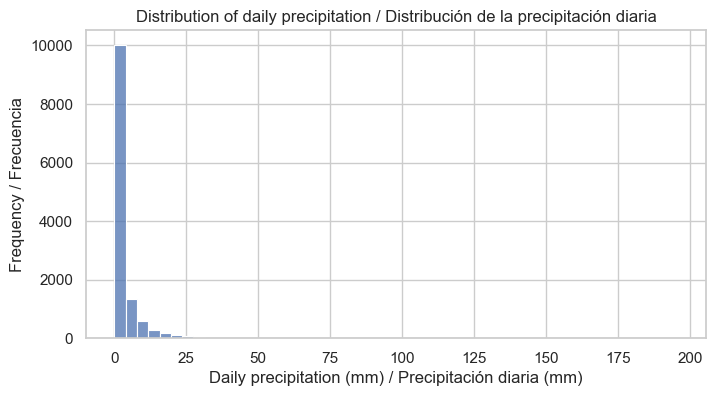

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df["precipitation_sum"], bins=50)
plt.xlabel("Daily precipitation (mm) / Precipitación diaria (mm)")
plt.ylabel("Frequency / Frecuencia")
plt.title("Distribution of daily precipitation / Distribución de la precipitación diaria")
plt.show()

2.2 Boxplot

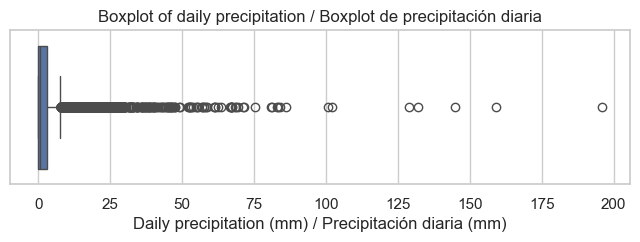

In [6]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df["precipitation_sum"])
plt.xlabel("Daily precipitation (mm) / Precipitación diaria (mm)")
plt.title("Boxplot of daily precipitation / Boxplot de precipitación diaria")
plt.show()

3. Rain vs No‑Rain Days / Días con lluvia vs sin lluvia

EN
We create an auxiliary binary variable to understand how frequent rainy days are.

ES
Creamos una variable binaria auxiliar para entender la frecuencia de días lluviosos.

/Users/alejandroagusti/miniforge3/envs/weather-ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


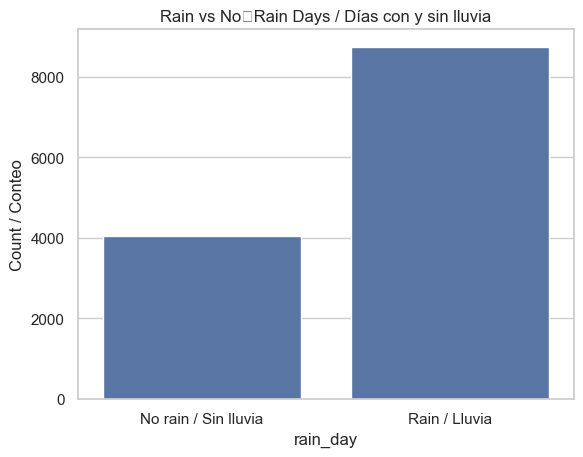

In [7]:
df["rain_day"] = (df["precipitation_sum"] > 0).astype(int)

df["rain_day"].value_counts(normalize=True)

sns.countplot(x="rain_day", data=df)
plt.xticks([0,1], ["No rain / Sin lluvia", "Rain / Lluvia"])
plt.ylabel("Count / Conteo")
plt.title("Rain vs No‑Rain Days / Días con y sin lluvia")
plt.show()

4. Temporal Evolution / Evolución temporal

EN
We inspect how precipitation evolves over time to identify seasonality and extreme events.

ES
Inspeccionamos la evolución temporal de la precipitación para identificar estacionalidad y eventos extremos.

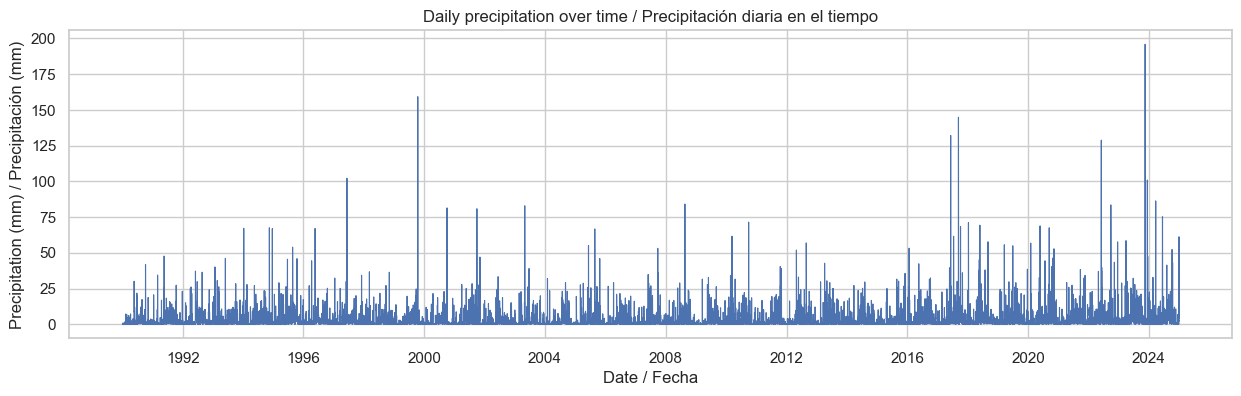

In [8]:
plt.figure(figsize=(15,4))
plt.plot(df["date"], df["precipitation_sum"], linewidth=0.8)
plt.xlabel("Date / Fecha")
plt.ylabel("Precipitation (mm) / Precipitación (mm)")
plt.title("Daily precipitation over time / Precipitación diaria en el tiempo")
plt.show()

5. Seasonality Analysis / Análisis de estacionalidad

EN
Monthly aggregation reveals strong seasonal patterns typical of subtropical climates.

ES
La agregación mensual revela patrones estacionales fuertes típicos de climas subtropicales.

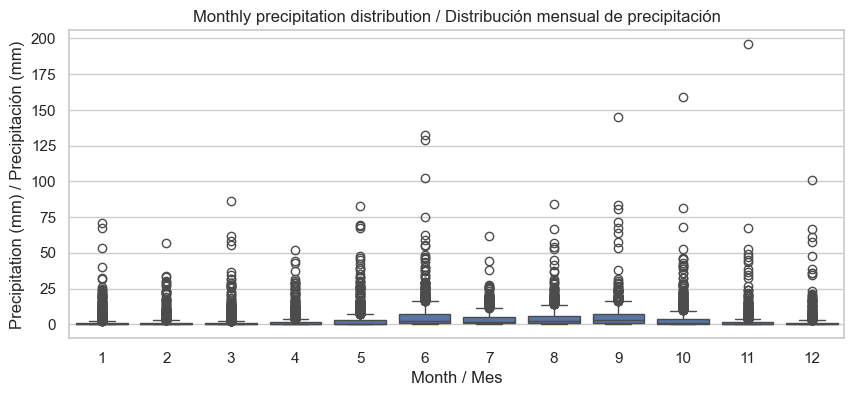

In [9]:
df["month"] = df["date"].dt.month


plt.figure(figsize=(10,4))
sns.boxplot(x="month", y="precipitation_sum", data=df)
plt.xlabel("Month / Mes")
plt.ylabel("Precipitation (mm) / Precipitación (mm)")
plt.title("Monthly precipitation distribution / Distribución mensual de precipitación")
plt.show()

6. Correlation with Physical Variables / Correlación con variables físicas

EN
We evaluate linear correlations between precipitation and selected physical variables.

ES
Evaluamos correlaciones lineales entre la precipitación y variables físicas seleccionadas

In [14]:
for c in df.columns:
    print(c)




time
temperature_2m_max
temperature_2m_min
temperature_2m_mean
precipitation_sum
relative_humidity_2m_mean
surface_pressure_mean
wind_speed_10m_mean
cloud_cover_mean
date
rain_day
month


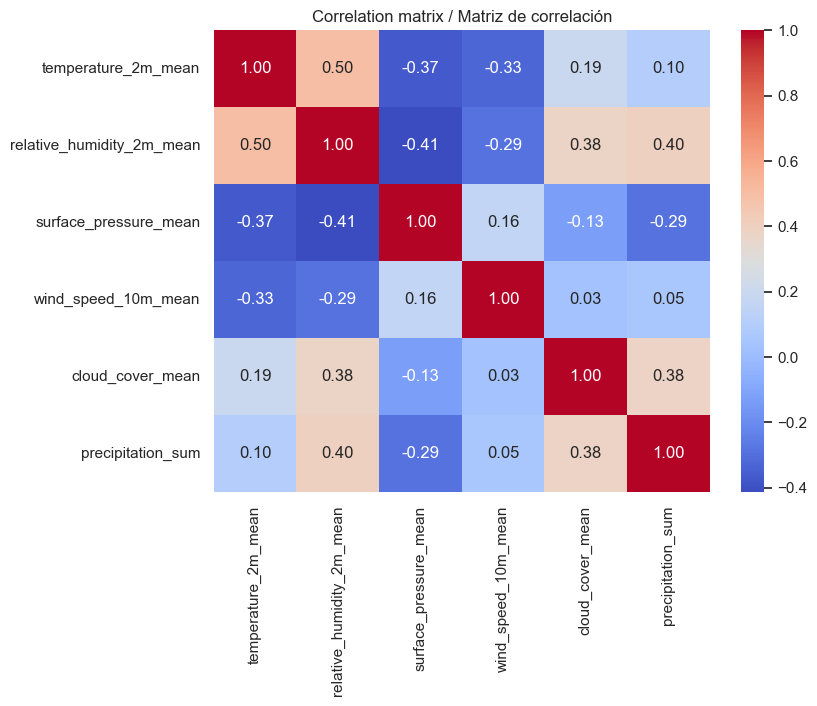

In [15]:
target = "precipitation_sum"

features = [
    "temperature_2m_mean",
    "relative_humidity_2m_mean",
    "surface_pressure_mean",
    "wind_speed_10m_mean",
    "cloud_cover_mean"
]

features = [f for f in features if f in df.columns]

corr = df[features + [target]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix / Matriz de correlación")
plt.show()

7. EDA Conclusions / Conclusiones del EDA

EN
Exploratory analysis reveals that daily precipitation in Miami is highly skewed, exhibits pronounced annual seasonality, and shows moderate correlation with humidity and cloud cover variables. These insights guide the feature engineering and model selection strategy for predictive regression.

ES
El análisis exploratorio muestra que la precipitación diaria en Miami es altamente sesgada, con una fuerte estacionalidad anual y correlaciones moderadas con variables como humedad y cobertura nubosa. Las variables físicas que mejor explican la variación de lluvia diaria están alineadas con teoría meteorológica, lo que refuerza la validez del dataset para modelado predictivo.